![example](images/director_shot.jpeg)

# Microsoft Movie Analysis - Phase1

**Authors:** Moses Kuria
***

## Overview

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Business Problem

The basis of the business problem is Microsoft trying to break into a market that is new to them. Their expertise is in Software products. The task is, therefore, to breakdown the market as a whole. What types of movies are made? What did it cost to make them? How much did they gross? What were their ratings? All of these are beneficial to a new player in an industry to have domain-specific knowledge and to focus their efforts on key areas.  


## What are the business's pain points related to this project?

As mentioned above, the fact that this is a novel industry for Microsoft makes this a significant challenge. A lot of research is needed before any investment can be made to minimize losses. 

## How did you pick the data analysis questions that you did?

I focused on what would make Microsoft studios money based on the sentiment of the population. This is influenced by the number of movies a particular genre is producing, the money the movies generate, the ratings and so on. This influenced the analysis.

## Why are these questions important from a business perspective?

This forms the basis of my analysis. A deep understanding of the business would help me understand where to look for insights, subtle nuances to the data that might influence the results and so on.

## Data Understanding

For this project, I chose the IMDB database data, and The Numbers budgets data for analysis. IMDB provided me with several titles, their genres, their ratings, how many votes were there and so on. The main role of The Numbers budgets data was the financials. Without the financials, we would be unable to know how much we would need for a movie, how much the movie would gross, average return on investment and so on. Ratings let us know the popularity, Genres let us know how we would produce these movies. All these are very vital to the analysis.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [2]:
! ls

Microsoft Movie Analysis Presentation.pdf
Microsoft Movie Analysis.ipynb
README.md
code
im.db
images
zippedData


In [3]:
# Here you run your code to explore the data
#establishing a connection to the database

conn = sqlite3.connect('zippedData\im.db\im.db')
cur = conn.cursor()

#executing  a query to understand the structure of the database

cur.execute( """SELECT name 
FROM sqlite_master
WHERE type = 'table'
;
""")
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [4]:
#querying the database for the movie_basics table

q1 = """SELECT *
FROM movie_basics
;
"""
movie_basics = pd.read_sql(q1, conn)

#understanding the structure of the data
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
#understanding the structure of the data

movie_basics.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [6]:
#understanding the structure of the data

movie_basics.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [7]:
#understanding the structure of the data

movie_basics.shape

(146144, 6)

In [8]:
#understanding the structure of the data

movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [9]:
#quering the database for the movie_ratings table

q2 = """SELECT *
FROM movie_ratings
;
"""
movie_ratings = pd.read_sql(q2, conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [10]:
#understanding the structure of the data

movie_ratings.tail()

,movie_id,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [11]:
#understanding the structure of the data

movie_ratings.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

In [12]:
#understanding the structure of the data

movie_ratings.shape

(73856, 3)

In [13]:
#understanding the structure of the data

movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [14]:
#importing the movie_budgets data into a Pandas DataFrame

movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv/tn.movie_budgets.csv")
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [15]:
#understanding the structure of the data

movie_budgets.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [16]:
#understanding the structure of the data

temp = movie_budgets[movie_budgets['domestic_gross'] == "$0"]
temp

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
194,95,"Dec 31, 2020",Moonfall,"$150,000,000",$0,$0
479,80,"Dec 13, 2017",Bright,"$90,000,000",$0,$0
480,81,"Dec 31, 2019",Army of the Dead,"$90,000,000",$0,$0
535,36,"Feb 21, 2020",Call of the Wild,"$82,000,000",$0,$0
617,18,"Dec 31, 2012",AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,"$77,600,000",$0,"$60,680,125"
...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0,$0
5764,65,"Dec 31, 2007",Tin Can Man,"$12,000",$0,$0
5771,72,"May 19, 2015",Family Motocross,"$10,000",$0,$0
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0


In [17]:
#understanding the structure of the data

movie_budgets.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [18]:
#understanding the structure of the data

movie_budgets.shape

(5782, 6)

In [19]:
#understanding the structure of the data

movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Observations

* Note that the movie budgets dataset has no missing values. Although this is the case, the production budget, domestic gross and worldwide gross columns are all objects. They are integer values and as such I would like them to be integers. Work is needed to change them into integers.





* Quite a number of rows in domestic gross and worldwide gross columns have zero values. This could prove interesting during analysis.

## Data Preparation



In [20]:
# Here you run your code to clean the data
#writing a query to join the movie_basics and movie_ratings tables

q4 = """SELECT *
FROM movie_basics
JOIN movie_ratings
    USING (movie_id)
;
"""
table_merge = pd.read_sql(q4, conn)
table_merge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5






I merged the tables here for easier analysis and data preparation





In [21]:
#understanding the difference between primary_title and original_title

pd.DataFrame(table_merge[['primary_title','original_title']][31:40])

,primary_title,original_title
31,Wazir,Wazir
32,The Wicker Tree,The Wicker Tree
33,The Overnight,The Overnight
34,In My Sleep,In My Sleep
35,My Land,Aamaar Bhuvan
36,Rice Girl,Rice Girl
37,Regret Not Speaking,Regret Not Speaking
38,"Tiden är en dröm, del 2","Tiden är en dröm, del 2"
39,This Wretched Life,This Wretched Life


In [22]:
#the original titles are not relevant because we have the 
#primary titles which even contain the translations in English.
#We are therefore free to drop the column.

table_merge.drop('original_title', axis = 1, inplace = True)

In [23]:
table_merge

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,2019,NaN,None,6.6,5


To understand the true movie rating, we have to know how many people actually voted for the said movie. The rating could be high but at the same time only 5 people voted for it, and the movie rating could be high, but many people voted for it. This is important to understand the sentiment of the population in general by having a representative sample size.

In [24]:
new_table = table_merge.sort_values(by =['numvotes'], axis = 0, ascending = False)
pd.DataFrame(new_table)

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
2387,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2241,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
280,tt0816692,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
12072,tt1853728,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
325,tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...,...,...,...
53263,tt5330830,Ann,2016,79.0,Drama,8.6,5
62310,tt6538150,The Whale Caller,2016,94.0,Drama,7.4,5
12881,tt1886495,Choctaw Code Talkers,2010,56.0,Documentary,8.8,5
6789,tt1666158,Crime,2010,70.0,Thriller,4.2,5


In [25]:
def identify_missing_values(data):
    """A simple function to check if data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})


    return missing

missing_data = identify_missing_values(table_merge)
missing_data

,Missing Values,Percentage(%)
runtime_minutes,7620,0.103174
genres,804,0.010886
numvotes,0,0.000000
averagerating,0,0.000000
start_year,0,0.000000
primary_title,0,0.000000
movie_id,0,0.000000


In [26]:
#Understand the impact of dropping the rows containing the runtime minutes. Could they contain a significant
#chunk of the numvotes? How important is the movie? Would it be better to just drop the column?

sorted_values = table_merge.sort_values(by='runtime_minutes', ascending=False, na_position='first')
pd.DataFrame(sorted_values)

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
5,tt0112502,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
17,tt0250404,Godfather,2012,NaN,"Crime,Drama",6.7,236
21,tt0263814,On kadin,2019,NaN,Drama,7.1,100
26,tt0285423,Abolição,2019,NaN,Documentary,7.4,35
...,...,...,...,...,...,...,...
66397,tt7349926,The Coffin Club,2017,4.0,"Documentary,Musical",9.4,5
57389,tt5884852,Donald Trump courageously stands up to Bill Cl...,2016,4.0,Documentary,4.3,6
66527,tt7379378,I Heart NY,2017,3.0,"Biography,Documentary",7.8,5
20749,tt2258391,Hermeneutics,2012,3.0,"Documentary,History,War",6.2,8


In [27]:
sorted_values2 = table_merge.sort_values(by='genres', ascending=False, na_position='first')
pd.DataFrame(sorted_values2)

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
18,tt0253093,Gangavataran,2018,134.0,None,6.6,8
29,tt0306058,Second Coming,2012,95.0,None,5.5,20
33,tt0326592,The Overnight,2010,88.0,None,7.5,24
37,tt0330811,Regret Not Speaking,2011,NaN,None,6.2,10
38,tt0330987,"Tiden är en dröm, del 2",2014,109.0,None,6.3,6
...,...,...,...,...,...,...,...
61290,tt6385842,Kaththi Sandai,2016,150.0,Action,3.2,178
23627,tt2379651,180 Segundos,2012,90.0,Action,5.7,112
23635,tt2379727,Bukunja Tekunja Mitti: The Cannibals,2012,NaN,Action,8.5,34
6204,tt1641253,The Wereth Eleven,2011,70.0,Action,6.1,159


In [28]:
#dropping rows with NaN values

table_merge.dropna(inplace = True)

In [29]:
#checking for missing values

table_merge.isna().sum()

movie_id           0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [30]:
#checking for duplicate values

table_merge.duplicated().value_counts()

False    65720
dtype: int64

In [31]:
#dropping irrelevant columns to analysis

table_merge.drop('runtime_minutes', axis = 1, inplace = True)

Again it's important to merge the budgets table and the movie basics and ratings tables. This allows us to have more data to work with in terms of financials, ratings and genres. Insights generated with this data will be more informed. 

In [32]:
#merging the tables to have a unified analysis

basics_budgets_merge = pd.merge(table_merge, movie_budgets, left_on='primary_title', right_on='movie')
basics_budgets_merge

,movie_id,primary_title,start_year,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
2,tt4339118,On the Road,2014,Drama,6.0,6,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
3,tt5647250,On the Road,2016,Drama,5.7,127,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
4,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
...,...,...,...,...,...,...,...,...,...,...,...,...
2747,tt8976472,Never Again,2018,"Documentary,Music",6.6,27,47,"Jul 12, 2002",Never Again,"$500,000","$307,631","$308,793"
2748,tt8824064,Heroes,2019,Documentary,7.3,7,12,"Oct 24, 2008",Heroes,"$400,000","$655,538","$655,538"
2749,tt8941440,Virus,2019,"Drama,Thriller",8.6,372,69,"Jan 15, 1999",Virus,"$75,000,000","$14,010,690","$30,626,690"
2750,tt8976772,Push,2019,Documentary,7.3,33,70,"Feb 6, 2009",Push,"$38,000,000","$31,811,527","$49,678,401"


In [33]:
basics_budgets_merge.shape

(2752, 12)

In [34]:
basics_budgets_merge.isna().sum()

movie_id             0
primary_title        0
start_year           0
genres               0
averagerating        0
numvotes             0
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [35]:
#dropping further irrelevant columns

basics_budgets_merge.drop( 'primary_title', axis=1, inplace = True)
basics_budgets_merge

,movie_id,start_year,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,2012,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0337692,2012,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
2,tt4339118,2014,Drama,6.0,6,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
3,tt5647250,2016,Drama,5.7,127,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
4,tt0359950,2013,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
...,...,...,...,...,...,...,...,...,...,...,...
2747,tt8976472,2018,"Documentary,Music",6.6,27,47,"Jul 12, 2002",Never Again,"$500,000","$307,631","$308,793"
2748,tt8824064,2019,Documentary,7.3,7,12,"Oct 24, 2008",Heroes,"$400,000","$655,538","$655,538"
2749,tt8941440,2019,"Drama,Thriller",8.6,372,69,"Jan 15, 1999",Virus,"$75,000,000","$14,010,690","$30,626,690"
2750,tt8976772,2019,Documentary,7.3,33,70,"Feb 6, 2009",Push,"$38,000,000","$31,811,527","$49,678,401"


In [36]:
#changing the release date column to datetime format
basics_budgets_merge['release_date'] = pd.to_datetime(basics_budgets_merge['release_date'])
basics_budgets_merge.head()

,movie_id,start_year,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,2012,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0337692,2012,"Adventure,Drama,Romance",6.1,37886,17,2013-03-22,On the Road,"$25,000,000","$720,828","$9,313,302"
2,tt4339118,2014,Drama,6.0,6,17,2013-03-22,On the Road,"$25,000,000","$720,828","$9,313,302"
3,tt5647250,2016,Drama,5.7,127,17,2013-03-22,On the Road,"$25,000,000","$720,828","$9,313,302"
4,tt0359950,2013,"Adventure,Comedy,Drama",7.3,275300,37,2013-12-25,The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"


In [37]:
#checking for missing values in the columns

basics_budgets_merge.isna().sum()

movie_id             0
start_year           0
genres               0
averagerating        0
numvotes             0
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [38]:
#checking for duplicate values in the DataFrame

basics_budgets_merge.duplicated().sum()

0

In [39]:
#checking for duplicate values in the movie column

basics_budgets_merge['movie'].duplicated().sum()

660

In [40]:
#dropping the duplicate values because we only need one name

basics_budgets_merge= basics_budgets_merge.drop_duplicates(subset='movie')
basics_budgets_merge.shape

(2092, 11)

In [41]:
#confirming that the duplicates have been dropped

basics_budgets_merge.duplicated().sum()

0

In [42]:
#cpnfirmong the columns have the correct dtypes for further manipulation

basics_budgets_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 2751
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           2092 non-null   object        
 1   start_year         2092 non-null   int64         
 2   genres             2092 non-null   object        
 3   averagerating      2092 non-null   float64       
 4   numvotes           2092 non-null   int64         
 5   id                 2092 non-null   int64         
 6   release_date       2092 non-null   datetime64[ns]
 7   movie              2092 non-null   object        
 8   production_budget  2092 non-null   object        
 9   domestic_gross     2092 non-null   object        
 10  worldwide_gross    2092 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 196.1+ KB


In [43]:
#changing the production_budget column from an object to an int

pd.set_option('mode.chained_assignment', None)
basics_budgets_merge['production_budget'] = basics_budgets_merge['production_budget'].str.replace('$','').str.replace(',', '')
basics_budgets_merge['production_budget'] = pd.to_numeric(basics_budgets_merge['production_budget'])
basics_budgets_merge['production_budget']

0        45000000
1        25000000
4        91000000
5        28000000
6       215000000
          ...    
2746       500000
2748       400000
2749     75000000
2750     38000000
2751      6000000
Name: production_budget, Length: 2092, dtype: int64

In [44]:
#changing the worldwide_gross column from an object to an int

pd.set_option('mode.chained_assignment', None)
basics_budgets_merge['worldwide_gross'] = basics_budgets_merge.loc[:, 'worldwide_gross'].str.replace('$','').str.replace(',', '')
basics_budgets_merge['worldwide_gross'] = pd.to_numeric(basics_budgets_merge.loc[:, 'worldwide_gross'])
basics_budgets_merge['worldwide_gross']

0            73706
1          9313302
4        187861183
5         62108587
6       1648854864
           ...    
2746        308793
2748        655538
2749      30626690
2750      49678401
2751      18107621
Name: worldwide_gross, Length: 2092, dtype: int64

In [45]:
#changing the domestic_gross column from an object to an int

pd.set_option('mode.chained_assignment', None)
basics_budgets_merge['domestic_gross'] = basics_budgets_merge.loc[:, 'domestic_gross'].str.replace('$','').str.replace(',', '')
basics_budgets_merge['domestic_gross'] = pd.to_numeric(basics_budgets_merge.loc[:, 'domestic_gross'])
basics_budgets_merge['domestic_gross']

0               0
1          720828
4        58236838
5        26017685
6       652270625
          ...    
2746       307631
2748       655538
2749     14010690
2750     31811527
2751     18107621
Name: domestic_gross, Length: 2092, dtype: int64

In [46]:
basics_budgets_merge['start_year'].max()

2019

## Data Modeling
I started by creating a list of the genres to be able to get a count of movies in the dataset. This would allow me to see which movies were the most popular by make. I then plotted a scatterplot of averagerating and production budget to see if there was any correlation between the two. Finally, I created a scatterplot of return on investment and production budget.  I wanted to see what was the relationship between the two. 

Initially, I had not thought of plotting return on investment against production budget. Taking a look at the business problem, I decided it was important for Microsoft to know what kind of returns to expect on their movie investments based on past data. I also decided to analyze the year with the highest number of movies, months with the most movies on average and the months with the highest revenue on average. 

I think these choices are appropriate because they fit the data I used nicely. All the variables needed to make the models are available. Given the business problem, I think it gives Microsoft a direction to go in in terms of planning for the making of a movie.

##  1. Which year has the highest number of movies?

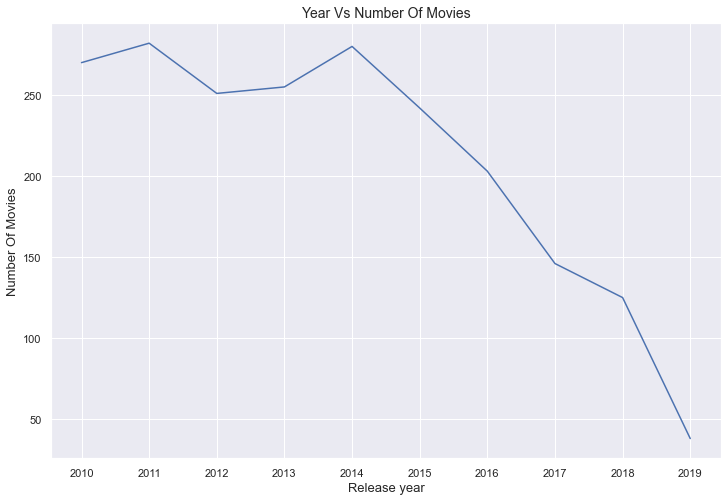

In [72]:
#visuallizing the year with the highest number of movies

movie_count =  basics_budgets_merge.groupby('start_year').count()['id']

movie_count.plot(xticks = np.arange(2010,2020,1))

sns.set(rc={'figure.figsize':(12,8)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
plt.savefig('./images/YearvsNoMovies', dpi = 300);

From this it is clear that 2014 was the year with the highest number of movies released. The trend seems to be that the number of movies released per year is reducing. It could the data is not as comprehensive to note the movies released in recent years. It could also be that at the time of the dataset formation, not all the movies had been released in 2019 and no sufficient data was available to fill the dataset.


## 2. Which Month had the highest release of movies on average?

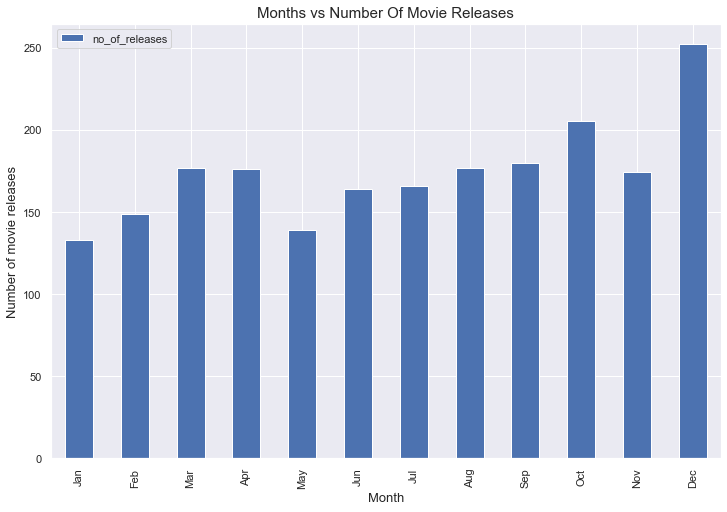

In [71]:
release_month = basics_budgets_merge['release_date'].dt.month

#count the movies in each month using value_counts().
no_of_releases = release_month.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
no_of_releases = pd.DataFrame(no_of_releases)
no_of_releases['month'] = months

#change the column name
no_of_releases.rename(columns = {'release_date':'no_of_releases'},inplace=True)

#plot the bar graph using plot.
no_of_releases.plot(x='month',kind='bar',fontsize = 11,figsize=(12,8))

#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13);
plt.savefig('./images/moviereleases', dpi=150)

In [49]:
no_of_releases

,no_of_releases,month
1,133,Jan
2,149,Feb
3,177,Mar
4,176,Apr
5,139,May
6,164,Jun
7,166,Jul
8,177,Aug
9,180,Sep
10,205,Oct


 On average, December had the highest number of movie releases from the period of 2010-2019. This is followed by October then September with March and August tieing at 4th.
 

## 3. Which month had the highest movie revenue on average?

In [50]:
for ind, row in basics_budgets_merge.iterrows():
    basics_budgets_merge.loc[ind, "revenue"] = row['worldwide_gross'] + row['domestic_gross']
basics_budgets_merge.head()

,movie_id,start_year,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue
0,tt0249516,2012,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,Foodfight!,45000000,0,73706,7.370600e+04
1,tt0337692,2012,"Adventure,Drama,Romance",6.1,37886,17,2013-03-22,On the Road,25000000,720828,9313302,1.003413e+07
4,tt0359950,2013,"Adventure,Comedy,Drama",7.3,275300,37,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,2.460980e+08
5,tt0365907,2014,"Action,Crime,Drama",6.5,105116,67,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,8.812627e+07
6,tt0369610,2015,"Action,Adventure,Sci-Fi",7.0,539338,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2.301125e+09


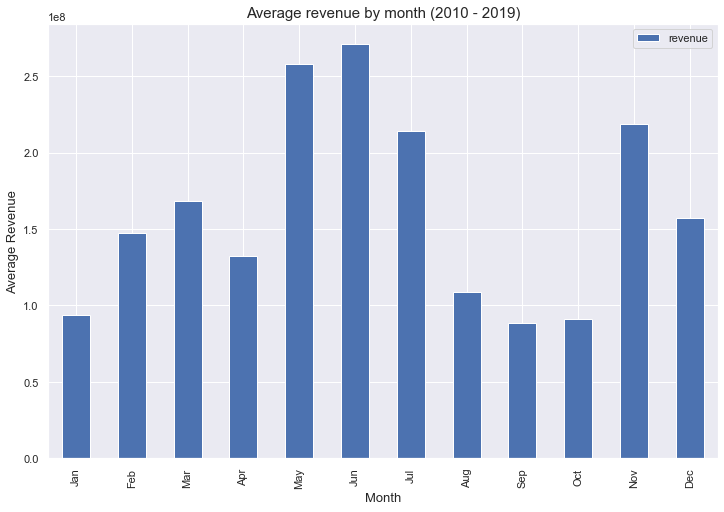

In [70]:
# dataFrame to store the release month of each movie
release_month = pd.DataFrame(release_month)

#renaming the column
release_month.rename(columns = {'release_date':'release_month'},inplace=True)

#adding column to dataFrame
release_month['revenue'] = basics_budgets_merge['revenue']

#group by mont and chain the aggregation function mean
mean_revenue  = release_month.groupby('release_month').mean()
mean_revenue['month'] = months

#make the bar plot using pandas plot function.
mean_revenue.plot(x='month',kind='bar',figsize = (12,8),fontsize=11)

#setup the title and lables of the plot.
plt.title('Average revenue by month (2010 - 2019)',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Average Revenue',fontsize = 13);
plt.savefig('./images/movierevenue', dpi=150)

In [52]:
mean_revenue.sort_values(by = 'revenue', ascending = False)

,revenue,month
release_month,,
6,2.708073e+08,Jun
5,2.576196e+08,May
11,2.185307e+08,Nov
7,2.143045e+08,Jul
3,1.683433e+08,Mar
12,1.572920e+08,Dec
2,1.471490e+08,Feb
4,1.325969e+08,Apr
8,1.090869e+08,Aug


The month with the highest revenue on average from 2010 to 2019 is June. This is followed by May, November and then July.

##  4. Which genre has the highest count of movies?

In [53]:
# Here you run your code to model the data
#creating a list of the genres

list_of_genres =[]
for value in basics_budgets_merge['genres']:
         list_of_genres.append(value.split(','))
list_of_genres1 = []
for item in list_of_genres:
    for value1 in item:
        list_of_genres1.append(value1)
list_of_genres2 = []
for item in list_of_genres1:
    if item not in list_of_genres2:
        list_of_genres2.append(item)
list_of_genres2

['Action',
 'Animation',
 'Comedy',
 'Adventure',
 'Drama',
 'Romance',
 'Crime',
 'Sci-Fi',
 'Family',
 'Thriller',
 'Horror',
 'Mystery',
 'Biography',
 'History',
 'War',
 'Fantasy',
 'Sport',
 'Music',
 'Documentary',
 'Western',
 'Musical',
 'News']

In [54]:
#using the collections library to count the number of occurrences of each genre

import collections
num_of_values = collections.Counter(list_of_genres1)
num_of_values

Counter({'Action': 519,
         'Animation': 117,
         'Comedy': 641,
         'Adventure': 397,
         'Drama': 1064,
         'Romance': 252,
         'Crime': 304,
         'Sci-Fi': 167,
         'Family': 115,
         'Thriller': 363,
         'Horror': 264,
         'Mystery': 167,
         'Biography': 166,
         'History': 56,
         'War': 27,
         'Fantasy': 145,
         'Sport': 46,
         'Music': 61,
         'Documentary': 120,
         'Western': 14,
         'Musical': 12,
         'News': 1})

In [55]:
#changing the Counter object into a dict
#converting the dict into a DataFrame
#resetting the index

num_of_values = dict(num_of_values)
genres_produced = pd.DataFrame.from_dict(num_of_values, orient='index').reset_index()
genres_produced

,index,0
0,Action,519
1,Animation,117
2,Comedy,641
3,Adventure,397
4,Drama,1064
5,Romance,252
6,Crime,304
7,Sci-Fi,167
8,Family,115
9,Thriller,363


In [56]:
#renaming the columns to have more descriptive names

genres_produced = genres_produced.rename(columns={'index':'Genre', 0:'Count'})
genres_produced

,Genre,Count
0,Action,519
1,Animation,117
2,Comedy,641
3,Adventure,397
4,Drama,1064
5,Romance,252
6,Crime,304
7,Sci-Fi,167
8,Family,115
9,Thriller,363


In [57]:
#sorting the genre count from the most to the least

genres_produced = genres_produced.sort_values(by = 'Count', ascending = False)
genres_produced

,Genre,Count
4,Drama,1064
2,Comedy,641
0,Action,519
3,Adventure,397
9,Thriller,363
6,Crime,304
10,Horror,264
5,Romance,252
11,Mystery,167
7,Sci-Fi,167


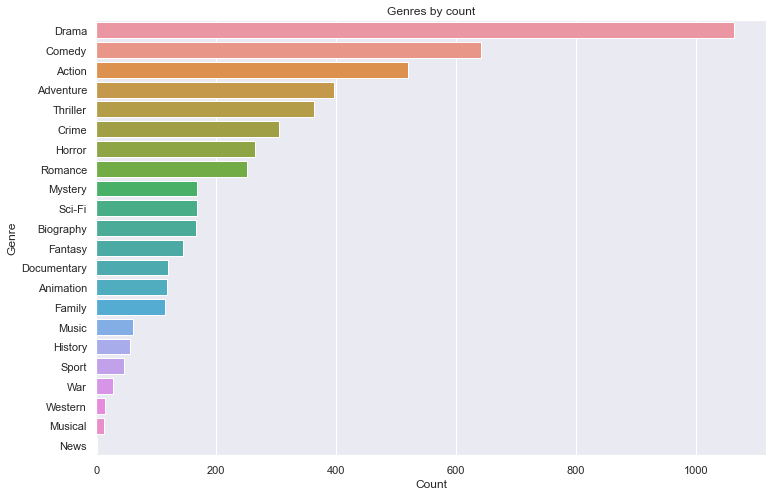

In [69]:
#visuallizing the count of genres

sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x=genres_produced['Count'],y=genres_produced['Genre'],data=genres_produced)
plt.title("Genres by count");
plt.savefig('./images/Genres', dpi=150)

It is clear that over the course from 2010-2019, the most popular movie genre by release is Drama. It should be noted that this contains movies with Drama exclusively as a genre as well as movies with Drama as a sub-genre. News is the least.

## 5. What is the correlation between the averagerating and the production budget?

In [59]:
#grouping the Data by genres and obtaining the mean
#dropping the numvotes column

new_table1 = new_table.groupby( 'genres').mean().sort_values(by ='averagerating', ascending = False )
new_table1 = new_table1.drop(['numvotes'], axis = 1)
new_table1

,start_year,runtime_minutes,averagerating
genres,,,
"Comedy,Documentary,Fantasy",2015.0,70.0,9.4
"Documentary,Family,Musical",2017.0,59.0,9.3
"History,Sport",2016.0,NaN,9.2
"Music,Mystery",2012.0,NaN,9.0
Game-Show,2013.0,130.0,9.0
...,...,...,...
"Crime,Music",2018.0,94.0,2.4
"History,Sci-Fi,Thriller",2017.0,120.0,2.3
"Adventure,Crime,Romance",2011.0,86.0,2.3


Correlation Between Production Budget And Average Rating :  0.17022241824815218


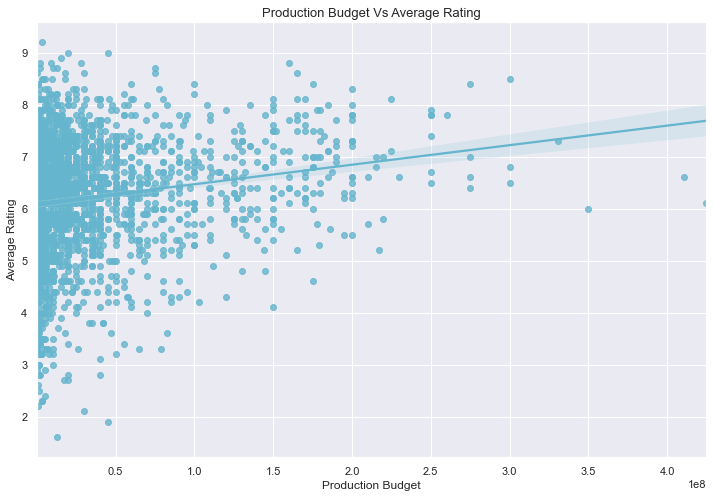

In [68]:
#visuallizing the averagerating vs the production_budget
data_corr = basics_budgets_merge.corr()
ax = sns.regplot(x=basics_budgets_merge['production_budget'],y=basics_budgets_merge['averagerating'],color='c')

#setup the title and the labels of the scatter plot.
ax.set_title("Production Budget Vs Average Rating",fontsize=13)
ax.set_xlabel("Production Budget",fontsize=12)
ax.set_ylabel("Average Rating",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(12,8)})

#find the correlation between them.
print("Correlation Between Production Budget And Average Rating : ",data_corr.loc['averagerating','production_budget'])
plt.savefig('./images/prodavg', dpi=150)

There is a low correlation between the averagerating and the production budget. This is peculiar because in most cases, we would expect a higher budget to produce a better movie and subsequently, earn a better rating for the movie. But this may be subject to bias as maybe it isn't the quality of the movie that the viewers did not like, but other personal biases. 

Since we could not find a strong correlation here, let us try and see if there is a correlation between the production budget and the revenue generated.


## 6. What is the correlation between the Production Budget and the Revenue generated?

Correlation Between Production Budget And Revenue :  0.7832389371146147


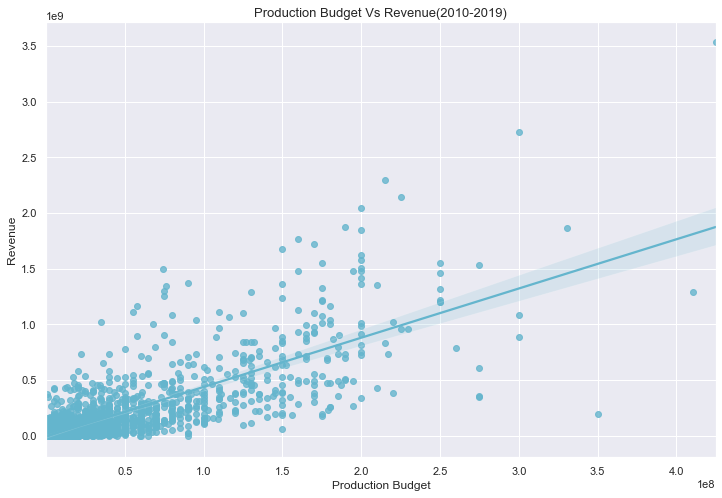

In [65]:
data_corr = basics_budgets_merge.corr()
ax = sns.regplot(x=basics_budgets_merge['production_budget'],y=basics_budgets_merge['revenue'],color='c')

#setup the title and the labels of the scatter plot.
ax.set_title("Production Budget Vs Revenue(2010-2019)",fontsize=13)
ax.set_xlabel("Production Budget",fontsize=12)
ax.set_ylabel("Revenue",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(12,8)})

#find the correlation between them.
print("Correlation Between Production Budget And Revenue : ", data_corr.loc['revenue','production_budget'])
plt.savefig('./images/prodrev', dpi=150)

We can see a high correlation between the production budget and revenue. This is to be expected as a higher production budget would mean a higher quality movie, more marketing and advertising of the movie, better actors which would lead to more people wanting to watch the movie and consequently a higher revenue.

While we have established this fact, a good indicator of how good a movie is would be its Return on Investment. This would accuratly show if this is a profitable business for the studio.

##  7. What is the correlation between the Return on Investment(ROI) and the production budget?

In [62]:
#calculating the profit to be able to have Return on Investment(ROI) calculations
#adding as a column to keep track of the info

for ind, row in basics_budgets_merge.iterrows():
    basics_budgets_merge.loc[ind, "Profit"] = row['worldwide_gross'] - row['production_budget']
basics_budgets_merge.head()

,movie_id,start_year,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,Profit
0,tt0249516,2012,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,Foodfight!,45000000,0,73706,7.370600e+04,-4.492629e+07
1,tt0337692,2012,"Adventure,Drama,Romance",6.1,37886,17,2013-03-22,On the Road,25000000,720828,9313302,1.003413e+07,-1.568670e+07
4,tt0359950,2013,"Adventure,Comedy,Drama",7.3,275300,37,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,2.460980e+08,9.686118e+07
5,tt0365907,2014,"Action,Crime,Drama",6.5,105116,67,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,8.812627e+07,3.410859e+07
6,tt0369610,2015,"Action,Adventure,Sci-Fi",7.0,539338,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2.301125e+09,1.433855e+09


In [63]:
#add column for ROI

basics_budgets_merge['roi'] = basics_budgets_merge['Profit'] / basics_budgets_merge['production_budget']
basics_budgets_merge

,movie_id,start_year,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,Profit,roi
0,tt0249516,2012,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,Foodfight!,45000000,0,73706,7.370600e+04,-4.492629e+07,-0.998362
1,tt0337692,2012,"Adventure,Drama,Romance",6.1,37886,17,2013-03-22,On the Road,25000000,720828,9313302,1.003413e+07,-1.568670e+07,-0.627468
4,tt0359950,2013,"Adventure,Comedy,Drama",7.3,275300,37,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,2.460980e+08,9.686118e+07,1.064409
5,tt0365907,2014,"Action,Crime,Drama",6.5,105116,67,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,8.812627e+07,3.410859e+07,1.218164
6,tt0369610,2015,"Action,Adventure,Sci-Fi",7.0,539338,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2.301125e+09,1.433855e+09,6.669092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,tt8662424,2017,Drama,5.7,67,47,2002-07-12,Never Again,500000,307631,308793,6.164240e+05,-1.912070e+05,-0.382414
2748,tt8824064,2019,Documentary,7.3,7,12,2008-10-24,Heroes,400000,655538,655538,1.311076e+06,2.555380e+05,0.638845
2749,tt8941440,2019,"Drama,Thriller",8.6,372,69,1999-01-15,Virus,75000000,14010690,30626690,4.463738e+07,-4.437331e+07,-0.591644
2750,tt8976772,2019,Documentary,7.3,33,70,2009-02-06,Push,38000000,31811527,49678401,8.148993e+07,1.167840e+07,0.307326


<ipython-input-67-c5429a202f52>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['${:,}'.format(int(x)) for x in ax[0].get_xticks()], rotation=45, ha='right')
<ipython-input-67-c5429a202f52>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['${:,}'.format(int(x)) for x in ax[1].get_xticks()], rotation=45, ha='right');


Correlation Between Production Budget And ROI :  -0.0324445085492397


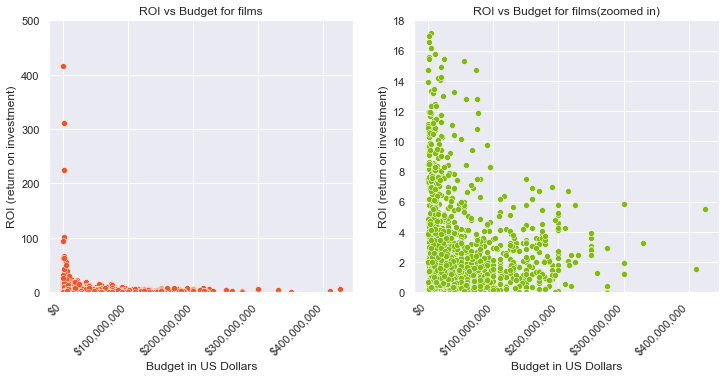

In [67]:
#visuallizing the Return on Investment vs the Budget
#ROI is calculated using the profit column and Budget column


budget = fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

budget = basics_budgets_merge['production_budget']
roi = basics_budgets_merge['roi']

sns.scatterplot(x = budget, y = roi, ax=ax[0], color = '#F35426')
sns.scatterplot(x = budget, y = roi, ax=ax[1], color = '#81BC0D')

ax[0].ticklabel_format(style='plain', axis='x')
ax[0].set_title('ROI vs Budget for films')
ax[0].set_ylabel('ROI (return on investment)')
ax[0].set_xlabel('Budget in US Dollars')
ax[0].set_ylim(0, 500)
ax[0].set_xticklabels(['${:,}'.format(int(x)) for x in ax[0].get_xticks()], rotation=45, ha='right')

ax[1].ticklabel_format(style='plain', axis='x')
ax[1].set_title('ROI vs Budget for films(zoomed in)')
ax[1].set_ylabel('ROI (return on investment)')
ax[1].set_xlabel('Budget in US Dollars')
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_ylim(0, 18)
ax[1].set_xticklabels(['${:,}'.format(int(x)) for x in ax[1].get_xticks()], rotation=45, ha='right');

print("Correlation Between Production Budget And ROI : ", data_corr.loc['roi','production_budget'])
plt.savefig('./images/popularitybyROI', dpi=150)

It would seem that the lower budget were more 'value for money' than the higher budget movies. This is indicated by the high volume of movies that seem to be higher on the Return on Investment scale while being lower on the budget scale. It is to be noted that quite a significant number of the low budget movies still have no return on investment. This insight should therefore be taken with caution as it could end up being disastrous.



## Evaluation
Having taken a look at the data in the last 10 years, we can see that the trend is that less movies are being made as time moves on. The reason for this is still unclear, more investigation is needed here. However, trying to optimize for the best results for Microsoft studios, we can see most movies were released in December and September. This is useful to know but the most important thing to know is the revenue generated per month. On average, June had the most revenue generated per month, followed by May, then September.

I then investigated the most popular genre by count. Drama was the most popular, followed by Comedy, Action, Adventure then Thriller. This informs Microsoft the direction they would most likely take if they were to choose a genre.

Finally, we take a look at factors influencing the financials and the effect of the financials on the overall outcome of the movies. We see that production budget has very little effect on the average rating of the movie. That seems to be an independent factor. However, we can see a high positive correlation between the production budget and the revenue generated. This is to be expected because of the reasons aforementioned. On the last plot, I opted for a different plot as opposed to the regression plot I had used earlier. Utilizing the regular scatter plot, I note that there were a significant number of movies that were lower budget that had a good return on investment. This showed 'value for money.' However, the overall production budget had a negative correlation with the return on investment, showing that production budget had little influence on the return on investment.

## Conclusions
Based on my analysis, this would be my recommendations to Microsoft:

1. Microsoft studios should focus on making Dramas, Comedies, Action, Adventure and Thrillers in the beginning of their production.


2.  Microsoft studios should aim to release their movies in June, May and September if they want to optimize their revenue 


3. Microsoft studios should manage their movie production budgets as higher investments do not necessarily lead to higher profits.

 
More analysis is needed to understand why movie releases have been less over the years since 2014 as well as to establish the Genres with the highest revenues.

Some points to note would be that in the averagerating, some movies had more votes than others that went into the determination of the rating. This leads to some innate bias in the rating bias. For example, 1,841,066 people voted for Inception while only 5 people voted for The Lambirds.Inception has an 8.8 averagerating while The Lambirds has a 9.2 averagerating. This has some influence on the final rating as this is the averagerating, determined by the number of people voting  and their overall votes.

The gross data also contains a significant number of zeros that I chose to keep in the dataset. I found that there might be movies, however unrealistic, that did not generate any revenue. This could be due to a number of factors like inability to strike a deal with the companies owning cinemas, streaming services and so on. More investigation is needed to determine if this is the case. However, until then, I opt to keep them in my analysis.